# Restaurant Chains Analysis

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
chain_counts = df["Restaurant Name"].value_counts()

restaurant_chains = chain_counts[chain_counts > 1]

print("Number of chains:", len(restaurant_chains))
restaurant_chains.head(10)

Number of chains: 734


Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64

In [7]:
chains_data = df[df["Restaurant Name"].isin(restaurant_chains.index)]
chains_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.9,Dark Green,Excellent,1070
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.8,Dark Green,Excellent,294
35,6601589,Coco Bambu,30,Bras�_lia,"Bras�_lia Shopping - Piso 2, SCN 5, Bloco A, A...","Bras�_lia Shopping, Asa Norte","Bras�_lia Shopping, Asa Norte, Bras�_lia",-47.889000,-15.786500,International,...,Brazilian Real(R$),No,No,No,No,4,4.2,Green,Very Good,17
39,6600427,Coco Bambu,30,Bras�_lia,"SCES, Trecho 2, Conjunto 13/36, Setor de Clube...",Setor De Clubes Esportivos Sul,"Setor De Clubes Esportivos Sul, Bras�_lia",-47.868500,-15.819000,International,...,Brazilian Real(R$),No,No,No,No,4,4.9,Dark Green,Excellent,30


In [8]:
chain_analysis = chains_data.groupby("Restaurant Name").agg({
    "Aggregate rating": "mean",
    "Votes": "mean",
    "Restaurant ID": "count"
}).rename(columns={
    "Aggregate rating": "Avg Rating",
    "Votes": "Avg Votes",
    "Restaurant ID": "Branch Count"
})

chain_analysis.head()

,Avg Rating,Avg Votes,Branch Count
Restaurant Name,,,
10 Downing Street,4.000000,335.000000,2
221 B Baker Street,3.366667,71.666667,3
34 Parkstreet Lane,3.050000,15.500000,2
"34, Chowringhee Lane",2.791667,64.750000,12
4700BC Popcorn,3.500000,88.000000,2


In [9]:
top_chains = chain_analysis.sort_values(
    by="Branch Count", ascending=False
).head(10)

top_chains

,Avg Rating,Avg Votes,Branch Count
Restaurant Name,,,
Cafe Coffee Day,2.419277,29.253012,83
Domino's Pizza,2.740506,84.088608,79
Subway,2.907937,97.206349,63
Green Chick Chop,2.672549,18.901961,51
McDonald's,3.339583,110.229167,48
Keventers,2.870588,37.147059,34
Pizza Hut,3.320000,165.366667,30
Giani,2.689655,29.448276,29
Baskin Robbins,1.860714,15.285714,28


# Visualization

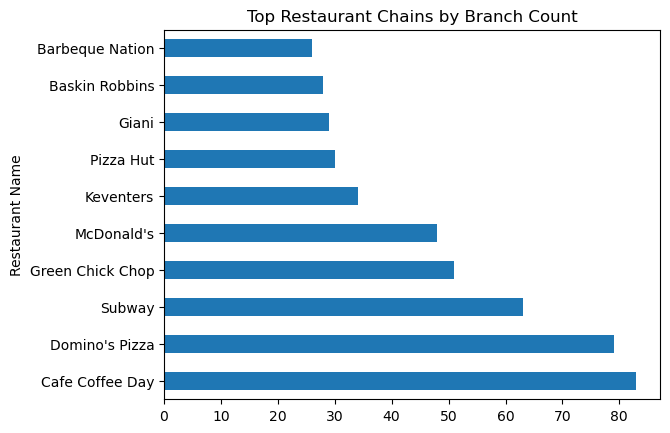

In [10]:
top_chains["Branch Count"].plot(kind="barh")
plt.title("Top Restaurant Chains by Branch Count")
plt.show()

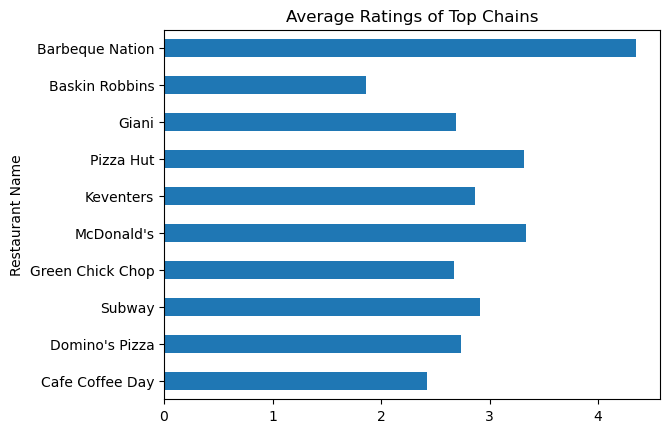

In [13]:
top_chains["Avg Rating"].plot(kind="barh")
plt.title("Average Ratings of Top Chains")
plt.show()

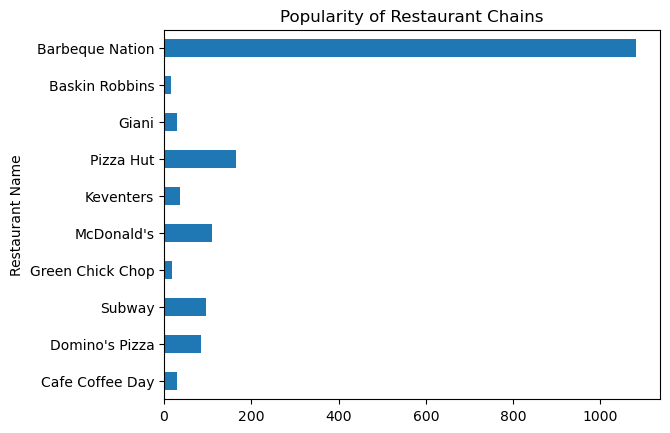

In [14]:
top_chains["Avg Votes"].plot(kind="barh")
plt.title("Popularity of Restaurant Chains")
plt.show()

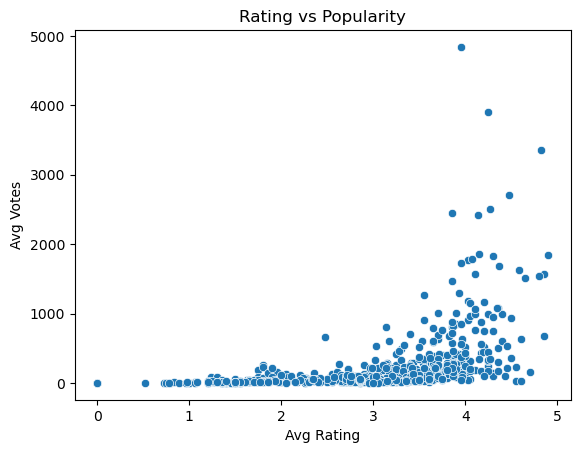

In [13]:
sns.scatterplot(
    data=chain_analysis,
    x="Avg Rating",
    y="Avg Votes"
)
plt.title("Rating vs Popularity")
plt.show()

In [16]:
votes = df.groupby("Restaurant Name")["Votes"].sum().reset_index()

votes.rename(columns={"Votes": "Total Votes"}, inplace=True)

votes.head()

,Restaurant Name,Total Votes
0,#45,209
1,#Dilliwaala6,124
2,#InstaFreeze,2
3,#OFF Campus,216
4,#Urban Caf��,49


In [17]:
votes = votes.sort_values(by="Total Votes", ascending=False)

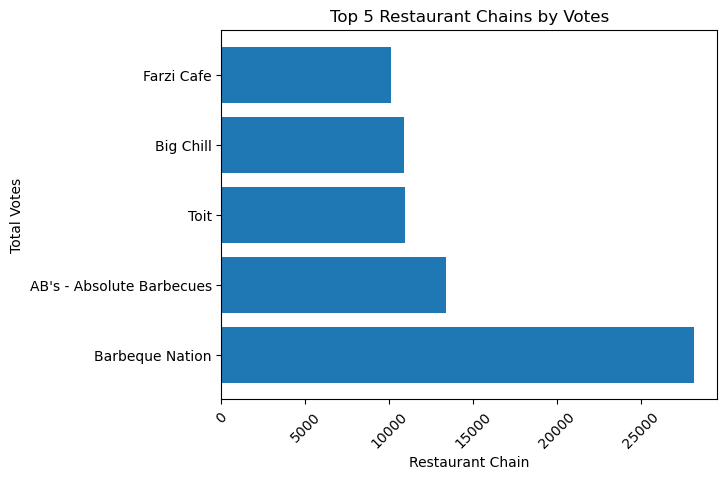

In [18]:
import matplotlib.pyplot as plt

plt.barh(votes["Restaurant Name"][:5],
        votes["Total Votes"][:5])

plt.xlabel("Restaurant Chain")
plt.ylabel("Total Votes")
plt.title("Top 5 Restaurant Chains by Votes")
plt.xticks(rotation=45)
plt.show()